# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

X_train1 = X_train.flatten()
w,b = np.polyfit(X_train1, y_train, deg=1)
print(w, b)

### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
def mse(true, pred):    
    return np.mean((true - pred)**2)

def mae(true, pred):    
    return np.mean(np.abs(true - pred))

y_test_predicted = X_test * w + b
print(mae(y_test, y_test_predicted.flatten()))
print(mean_absolute_error(y_test,y_test_predicted))

print("\n")
print(mean_squared_error(y_test,y_test_predicted))
print(mse(y_test, y_test_predicted.flatten()))



10.08399256366005 -7.092272484056808
8.229836368039244
8.229836368039244


103.10667696937472
103.10667696937472


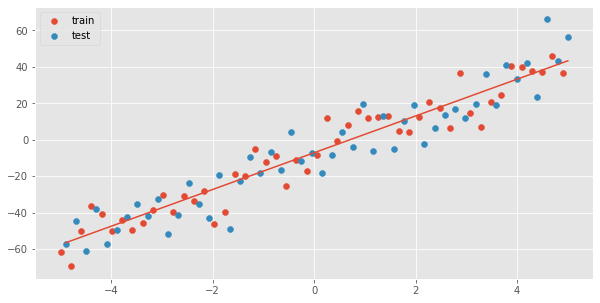

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будем брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w,b = np.polyfit(data['x_train'],data['y_train'], deg = 1)
print(w, b)
### Найдите значения метрик MSE и MAE
y_train_predicted = w * (data['support']) + b
print("\n")
print("MAE", mean_absolute_error(data['values'],y_train_predicted))
print("\n")
print("MSE", mean_squared_error(data['values'],y_train_predicted))


-0.31205530319819913 1.9919932743837756


MAE 0.3898028371139309


MSE 0.1971549409230359


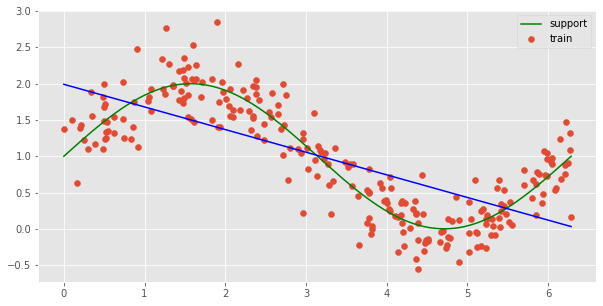

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x_train'], data['y_train'], label='train')
plt.plot(data['support'], data['values'],'green', label='support')
plt.legend(loc='best')
plt.plot(data['support'],y_train_predicted,'b')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

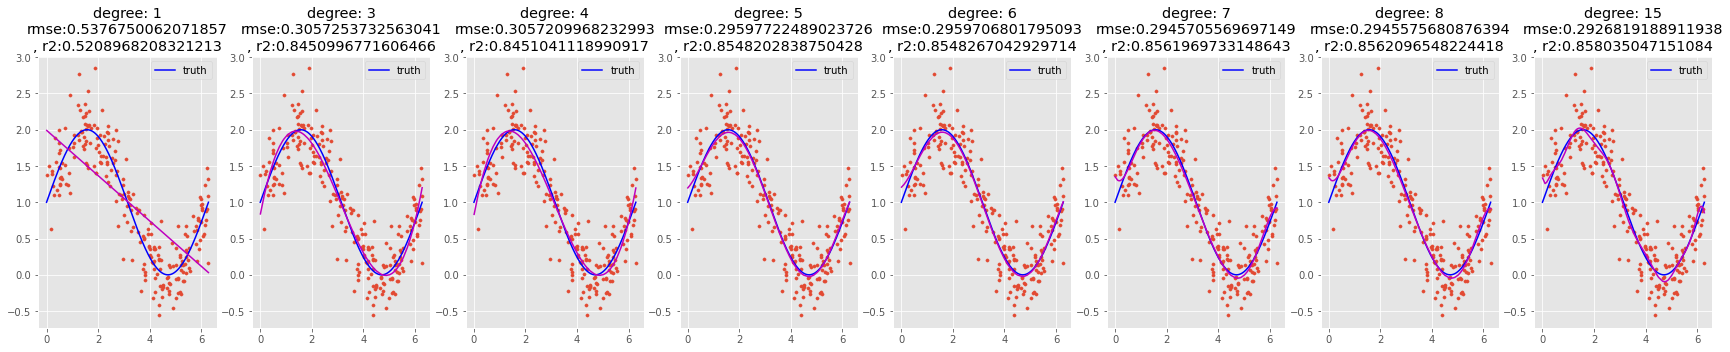

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
degrees = [1, 3, 4, 5, 6, 7, 8, 15]
x = data['x_train'][:, np.newaxis]
y = data['y_train'][:, np.newaxis]
plt.figure(figsize=(30,5))

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  polynomial_features= PolynomialFeatures(degrees[i])
  x_poly = polynomial_features.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)
  y_poly_pred = model.predict(x_poly)

  rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
  r2 = r2_score(y,y_poly_pred)
  plt.title(f"degree: {degrees[i]}\nrmse:{rmse}\n, r2:{r2}")

  plt.scatter(x, y, s=10)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
  x, y_poly_pred = zip(*sorted_zip)
  plt.plot(data['support'],data['values'],'b', label="truth")
  plt.plot(x, y_poly_pred, color='m')
  plt.legend()
plt.show()
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
 
### Полином какой степени подходит больше других? Почему?

Как можно увидеть на графиках на степени до 4ой происходит недообучение, а на степенях после 7ой переобучение. Поэтому скорее всего подойдет либо 5 либо 6 т.к. у полинома наибольшее совпадение с truth.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
house_data = load_boston()
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']
display(X.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe31f62a50>,
      dtype=object)

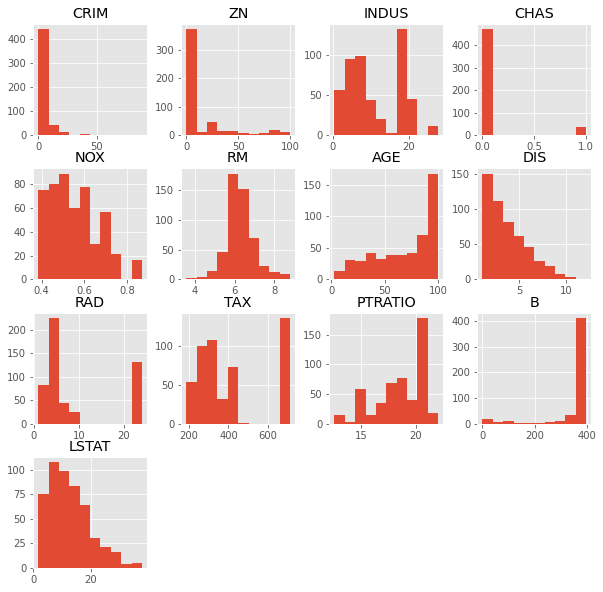

In [ ]:
X.hist(X.columns, figsize=(10, 10))

## Задание 3.4

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()

model.fit(X_train, y_train)

X_series = pd.Series(data=np.abs(model.coef_), index=X.columns)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
### оставьте в наборе данных только 7 наиболее значимых признаков
top7 = np.argpartition(abs(model.coef_), 7)[-7:]
X_train=X_train[:,top7]
w = model.coef_[top7]
model =LinearRegression()
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))

Train MAE:  3.2642281420083874
Train MSE:  21.688513135719788
Train MAE:  3.5228122771004378
Train MSE:  24.189637176167455
